<a href="https://colab.research.google.com/github/Ayushn24/scRNA_glioblstoma_clustering/blob/main/scRNA_glioblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.2 MB/s eta 0:00:00


In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import zipfile
import os

# Unzip into a folder called "data"
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data")

# List the extracted files
os.listdir("data")

['matrix.mtx', 'genes.tsv', 'barcodes.tsv']

In [ ]:
adata = sc.read_10x_mtx("data",var_names="gene_symbols",cache=True)
adata

AnnData object with n_obs × n_vars = 5697 × 1186
    var: 'gene_ids'

In [ ]:
adata.var

,gene_ids
GNB1,ENSG00000078369
TP73,ENSG00000078900
PARK7,ENSG00000116288
TARDBP,ENSG00000120948
MTOR,ENSG00000198793
...,...
MECP2,ENSG00000169057
FLNA,ENSG00000196924
TAZ,ENSG00000102125
RAB39B,ENSG00000155961


In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 4433 × 1138
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [ ]:
#Adding new columns "mt", "rb", "hb" to label which genes are mitochondrial, ribosomal and hemoglobin genes respectively
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
adata.var

,gene_ids,n_cells,mt,ribo,hb
GNB1,ENSG00000078369,3922,False,False,False
TP73,ENSG00000078900,27,False,False,False
PARK7,ENSG00000116288,4231,False,False,False
TARDBP,ENSG00000120948,2732,False,False,False
MTOR,ENSG00000198793,958,False,False,False
...,...,...,...,...,...
L1CAM,ENSG00000198910,157,False,False,False
MECP2,ENSG00000169057,2570,False,False,False
FLNA,ENSG00000196924,3228,False,False,False
TAZ,ENSG00000102125,1984,False,False,False


In [ ]:
adata.var[adata.var.mt == True] #no mitochondrial genes

,gene_ids,n_cells,mt,ribo,hb


In [ ]:
adata.var[adata.var.ribo == True] #1 ribogenes

,gene_ids,n_cells,mt,ribo,hb
RPL39L,ENSG00000163923,250,False,True,False


In [ ]:
adata.var[adata.var.hb == True] #no hemoglobin genes

,gene_ids,n_cells,mt,ribo,hb


In [ ]:
sc.pp.calculate_qc_metrics( adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=False,percent_top=None)

In [ ]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
AAACCCACAAGTCCCG-1,438,438,3427.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCACAGATGCGA-1,266,266,1352.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCACAGGTGAGT-1,331,331,1636.0,0.0,0.0,1.0,0.061125,0.0,0.0
AAACCCAGTCTTGCGG-1,257,257,678.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACGAAAGTAATCCC-1,338,338,2764.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
TTTGGTTGTGCTTCAA-1,464,464,4836.0,0.0,0.0,0.0,0.000000,0.0,0.0
TTTGGTTTCGCTACAA-1,360,360,2057.0,0.0,0.0,1.0,0.048614,0.0,0.0
TTTGTTGCATCCGGTG-1,205,205,972.0,0.0,0.0,0.0,0.000000,0.0,0.0
TTTGTTGGTCTACACA-1,469,469,4189.0,0.0,0.0,0.0,0.000000,0.0,0.0


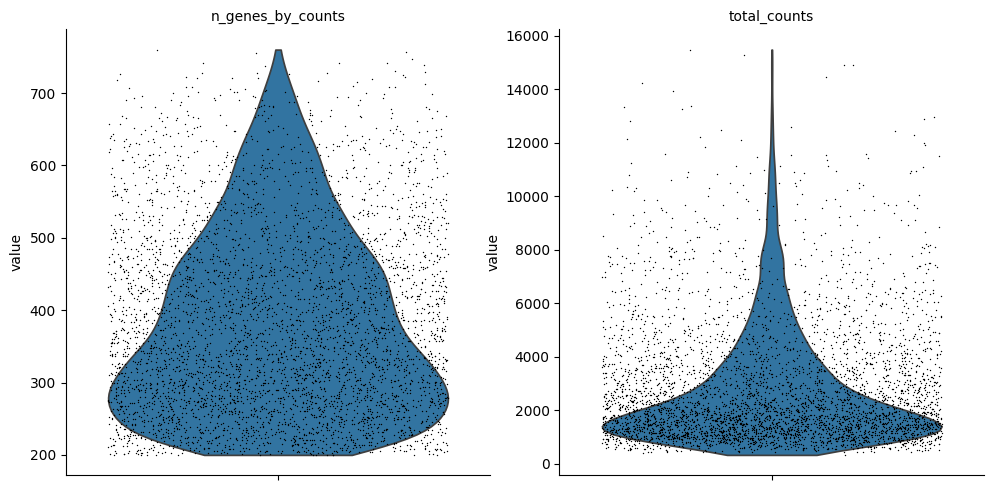

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
adata.obs[["n_genes_by_counts", "total_counts"]]

,n_genes_by_counts,total_counts
AAACCCACAAGTCCCG-1,438,3427.0
AAACCCACAGATGCGA-1,266,1352.0
AAACCCACAGGTGAGT-1,331,1636.0
AAACCCAGTCTTGCGG-1,257,678.0
AAACGAAAGTAATCCC-1,338,2764.0
...,...,...
TTTGGTTGTGCTTCAA-1,464,4836.0
TTTGGTTTCGCTACAA-1,360,2057.0
TTTGTTGCATCCGGTG-1,205,972.0
TTTGTTGGTCTACACA-1,469,4189.0


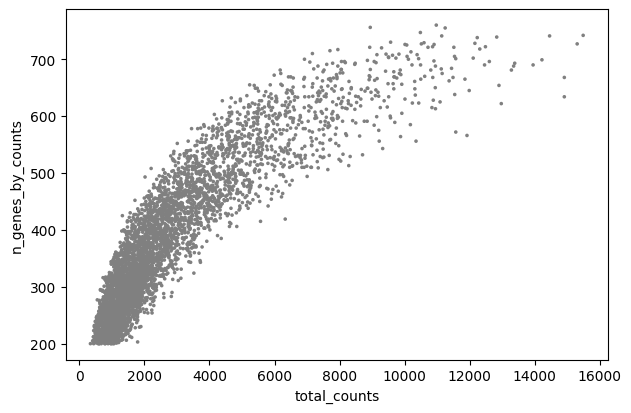

In [ ]:
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [ ]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
print(f"{lower_lim} to {upper_lim}")


207.0 to 670.3599999999997


In [ ]:
adata = adata[(adata.obs.n_genes_by_counts>=lower_lim) & (adata.obs.n_genes_by_counts<=upper_lim)]
adata

View of AnnData object with n_obs × n_vars = 4264 × 1138
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
#Log-Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adata

AnnData object with n_obs × n_vars = 4264 × 1138
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [ ]:
df = adata.to_df()
df

,GNB1,TP73,PARK7,TARDBP,MTOR,MTHFR,CLCN6,NPPB,MFN2,TNFRSF1B,...,XIAP,SLC9A6,FMR1,ATP2B3,PLXNB3,L1CAM,MECP2,FLNA,TAZ,RAB39B
AAACCCACAAGTCCCG-1,2.746631,0.0,3.661869,2.277679,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,1.365582,1.922204,0.000000,0.0,0.0,0.0,0.000000,2.746631,1.365582,0.0
AAACCCACAGATGCGA-1,2.759561,0.0,3.420536,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.097200,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
AAACCCACAGGTGAGT-1,3.236711,0.0,3.236711,3.236711,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,1.961850,1.961850,0.0,0.0,0.0,1.961850,0.000000,1.961850,0.0
AAACCCAGTCTTGCGG-1,0.000000,0.0,4.094296,0.000000,0.000000,2.756793,0.000000,0.0,0.0,0.000000,...,2.756793,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.756793,0.000000,0.0
AAACGAAAGTAATCCC-1,2.108501,0.0,3.122703,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.122703,...,0.000000,0.000000,2.108501,0.0,0.0,0.0,2.108501,2.739018,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTCCACATA-1,0.000000,0.0,2.352779,3.385889,2.352779,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
TTTGGTTGTGCTTCAA-1,1.974563,0.0,3.076309,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.120969,...,1.636206,0.000000,1.636206,0.0,0.0,0.0,0.000000,2.739211,0.000000,0.0
TTTGGTTTCGCTACAA-1,2.746267,0.0,3.556209,2.372381,0.000000,0.000000,1.768397,0.0,0.0,0.000000,...,0.000000,0.000000,2.746267,0.0,0.0,0.0,2.746267,0.000000,0.000000,0.0
TTTGTTGGTCTACACA-1,1.220005,0.0,3.980027,1.753436,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,1.753436,1.220005,0.0,0.0,0.0,1.753436,4.437368,1.220005,0.0


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

In [ ]:
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"],index = df.index)
pca_df

,PC1,PC2
AAACCCACAAGTCCCG-1,-11.537526,-4.578429
AAACCCACAGATGCGA-1,25.913792,-4.710539
AAACCCACAGGTGAGT-1,-2.084903,20.105879
AAACCCAGTCTTGCGG-1,-8.570834,1.098883
AAACGAAAGTAATCCC-1,19.999994,-4.208662
...,...,...
TTTGGTTGTCCACATA-1,24.049086,-4.466111
TTTGGTTGTGCTTCAA-1,-4.908523,-5.861107
TTTGGTTTCGCTACAA-1,-3.101318,21.040573
TTTGTTGGTCTACACA-1,-9.842435,-6.479253


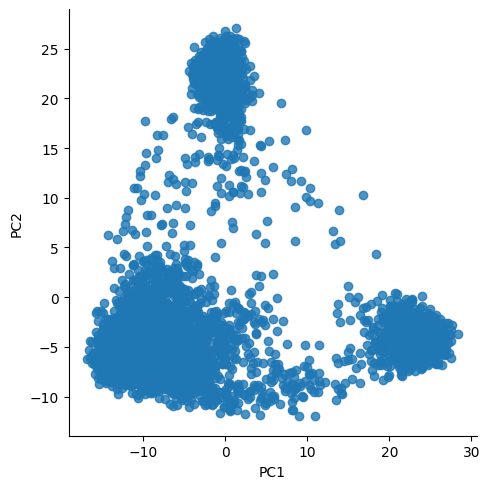

In [ ]:
sns.lmplot(pca_df,x="PC1",y="PC2",fit_reg=False)

In [ ]:
#clustering with PCA
from sklearn.cluster import KMeans
wcss = []
for i in range(1,7):
  km = KMeans(n_clusters=i,init="k-means++",random_state=42)
  k = km.fit(pca_df)
  wcss.append(k.inertia_)
wcss


[1164685.75,
 603945.0,
 110489.015625,
 75765.8046875,
 62759.06640625,
 49539.07421875]

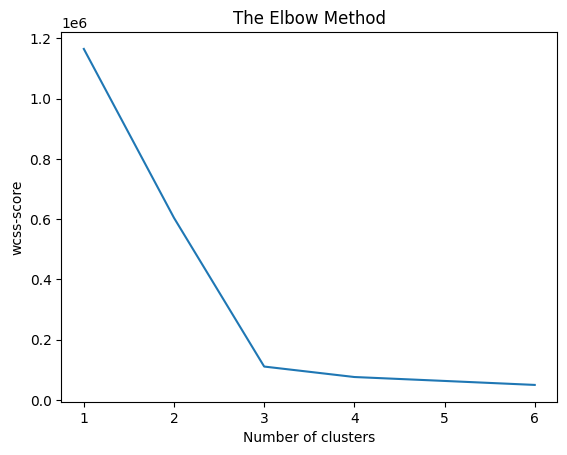

In [ ]:
plt.plot(range(1,7),wcss)
plt.xticks(range(1,7))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss-score")
plt.show()

In [ ]:
#k = 3 is selected by looking at the elbow method
km = KMeans(n_clusters=3,init="k-means++",random_state=42)
k = km.fit(pca_df)
labels = k.labels_
labels

array([1, 2, 0, ..., 0, 1, 2], dtype=int32)

In [ ]:
labelled_PCA = pd.concat([pca_df,pd.DataFrame(labels,columns=["cluster"],index=df.index)],axis=1)
labelled_PCA

,PC1,PC2,cluster
AAACCCACAAGTCCCG-1,-11.537526,-4.578429,1
AAACCCACAGATGCGA-1,25.913792,-4.710539,2
AAACCCACAGGTGAGT-1,-2.084903,20.105879,0
AAACCCAGTCTTGCGG-1,-8.570834,1.098883,1
AAACGAAAGTAATCCC-1,19.999994,-4.208662,2
...,...,...,...
TTTGGTTGTCCACATA-1,24.049086,-4.466111,2
TTTGGTTGTGCTTCAA-1,-4.908523,-5.861107,1
TTTGGTTTCGCTACAA-1,-3.101318,21.040573,0
TTTGTTGGTCTACACA-1,-9.842435,-6.479253,1


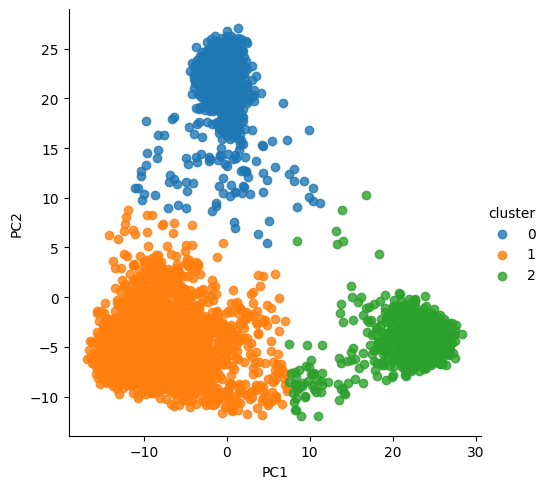

In [ ]:
sns.lmplot(labelled_PCA,x="PC1",y="PC2",hue="cluster",fit_reg=False)

In [ ]:
#Decomposition using UMAP
import umap
umap_model = umap.UMAP(n_neighbors=15,min_dist=0.1,spread=3,n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df)
UMAP_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"],index = df.index)
UMAP_df

,UMAP1,UMAP2
AAACCCACAAGTCCCG-1,17.930178,21.150131
AAACCCACAGATGCGA-1,-8.671251,4.114169
AAACCCACAGGTGAGT-1,10.608177,-14.880250
AAACCCAGTCTTGCGG-1,19.878290,17.262712
AAACGAAAGTAATCCC-1,-6.732050,4.817943
...,...,...
TTTGGTTGTCCACATA-1,-9.369351,6.710092
TTTGGTTGTGCTTCAA-1,11.263672,21.311455
TTTGGTTTCGCTACAA-1,11.138795,-17.224459
TTTGTTGGTCTACACA-1,11.072333,17.992098


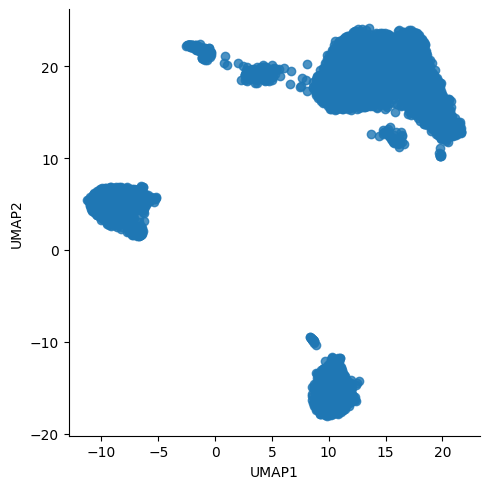

In [ ]:
sns.lmplot(UMAP_df,x="UMAP1",y="UMAP2",fit_reg=False)

In [ ]:
#clustering with UMAP
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,init="k-means++",random_state=42)
  k = km.fit(UMAP_df)
  wcss.append(k.inertia_)
wcss


[1142139.75,
 412735.71875,
 102270.8359375,
 57375.45703125,
 55801.79296875,
 31195.705078125,
 21399.744140625,
 17208.388671875,
 15020.7412109375,
 12685.060546875]

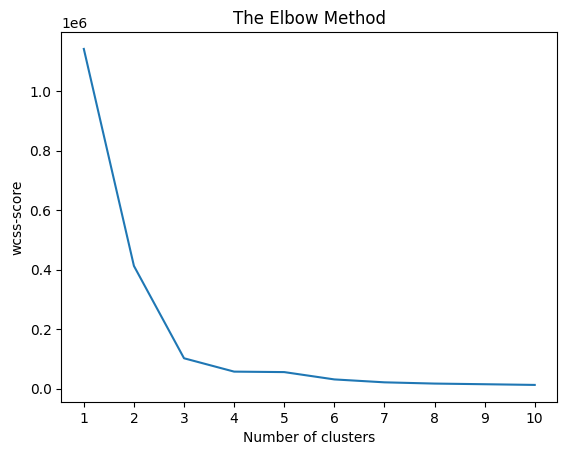

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss-score")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
#we will use kneeLocator to determine the optimal value for k
from kneed import KneeLocator
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"Optimal number of clusters: {optimal_k}")



Optimal number of clusters: 3


In [ ]:
#k = 3 is selected by looking at the elbow method
km = KMeans(n_clusters=3,init="k-means++",random_state=42)
k = km.fit(UMAP_df)
labels = k.labels_
labels
labelled_UMAP = pd.concat([UMAP_df,pd.DataFrame(labels,columns=["cluster"],index=df.index)],axis=1)
labelled_UMAP

,UMAP1,UMAP2,cluster
AAACCCACAAGTCCCG-1,17.930178,21.150131,1
AAACCCACAGATGCGA-1,-8.671251,4.114169,2
AAACCCACAGGTGAGT-1,10.608177,-14.880250,0
AAACCCAGTCTTGCGG-1,19.878290,17.262712,1
AAACGAAAGTAATCCC-1,-6.732050,4.817943,2
...,...,...,...
TTTGGTTGTCCACATA-1,-9.369351,6.710092,2
TTTGGTTGTGCTTCAA-1,11.263672,21.311455,1
TTTGGTTTCGCTACAA-1,11.138795,-17.224459,0
TTTGTTGGTCTACACA-1,11.072333,17.992098,1


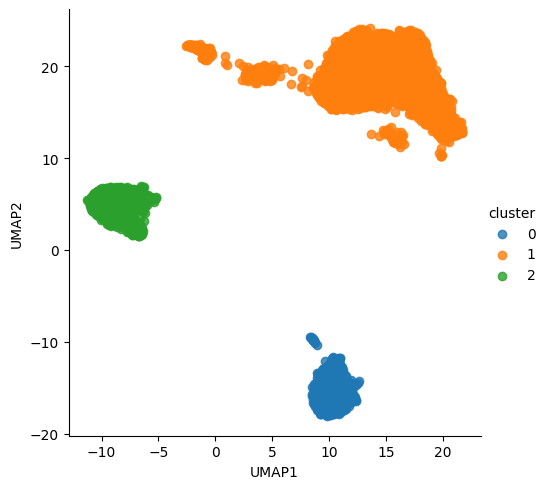

In [ ]:
sns.lmplot(labelled_UMAP,x="UMAP1",y="UMAP2",hue="cluster",fit_reg=False)

In [ ]:
#DBSCAN Clustering after UMAP Decomposition
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
d=dbscan.fit(UMAP_df)
labels = d.labels_
labels

array([0, 1, 2, ..., 2, 0, 1])

In [ ]:
dbscan_df = pd.concat([UMAP_df,pd.DataFrame(labels,columns=["cluster"],index=df.index)],axis=1)
dbscan_df

,UMAP1,UMAP2,cluster
AAACCCACAAGTCCCG-1,17.930178,21.150131,0
AAACCCACAGATGCGA-1,-8.671251,4.114169,1
AAACCCACAGGTGAGT-1,10.608177,-14.880250,2
AAACCCAGTCTTGCGG-1,19.878290,17.262712,0
AAACGAAAGTAATCCC-1,-6.732050,4.817943,1
...,...,...,...
TTTGGTTGTCCACATA-1,-9.369351,6.710092,1
TTTGGTTGTGCTTCAA-1,11.263672,21.311455,0
TTTGGTTTCGCTACAA-1,11.138795,-17.224459,2
TTTGTTGGTCTACACA-1,11.072333,17.992098,0


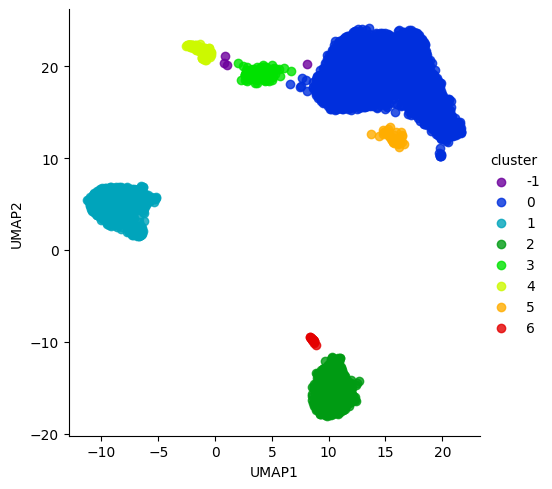

In [ ]:
sns.lmplot(dbscan_df,x="UMAP1",y="UMAP2",hue="cluster",fit_reg=False,palette="nipy_spectral")